In [4]:
#!/usr/bin/env python
# coding: utf-8

!pip install -q pandas
!pip install -q matplotlib
!pip install -q prophet
!pip install -q plotly
!pip install -q ipywidgets
!pip install -q jupyterlab
!pip install -q psutil

In [5]:
import numpy as np
import pandas as pd

import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly, plot_cross_validation_metric
from prophet.diagnostics import performance_metrics, cross_validation

In [6]:
# Read data
#csv_data = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
csv_data = pd.read_csv("https://github.com/ourownstory/neuralprophet-data/raw/main/kaggle-energy/datasets/tutorial01.csv")
df = csv_data

In [7]:
df.fillna(0)
df.describe

<bound method NDFrame.describe of               ds      y
0     2014-12-31  65.41
1     2015-01-01  62.09
2     2015-01-02  69.44
3     2015-01-03  65.22
4     2015-01-04  58.91
...          ...    ...
1457  2018-12-27  72.96
1458  2018-12-28  69.23
1459  2018-12-29  62.62
1460  2018-12-30  64.57
1461  2018-12-31  68.32

[1462 rows x 2 columns]>

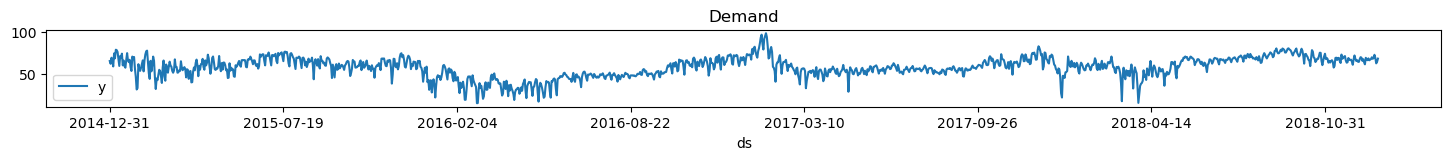

In [8]:
fig = df.plot( x='ds', y='y', title='Demand',figsize=(18,1))

In [9]:

########## Prophet ###############
# fit model and store output
#m = Prophet(yearly_seasonality=True, daily_seasonality=False, changepoint_range = 0.9, changepoint_prior_scale = 0.5, seasonality_mode = "additive") # additive multiplicative
#m = Prophet(interval_width=0.95, weekly_seasonality=True, daily_seasonality=True) # seasonality_mode = "additive", 
m = Prophet(weekly_seasonality=False, daily_seasonality=True,yearly_seasonality=True )
m.fit(df)
# create forecast
future = m.make_future_dataframe(periods=365, freq='d')
#future = m.make_future_dataframe(periods=365, freq='MS') # 50 d m  MS
#future = m.make_future_dataframe(periods=50, freq='d')
forecast = m.predict(future)


19:47:22 - cmdstanpy - INFO - Chain [1] start processing
19:47:23 - cmdstanpy - INFO - Chain [1] done processing


In [10]:
# show samples plots
future.tail()[:3]

,ds
1822,2019-12-27
1823,2019-12-28
1824,2019-12-29


In [11]:
forecast = m.predict(future)
forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail()[:3]

,ds,yhat,yhat_lower,yhat_upper
1822,2019-12-27,76.964144,57.669703,95.299949
1823,2019-12-28,76.609823,57.447147,95.028850
1824,2019-12-29,76.317774,58.062928,93.661195


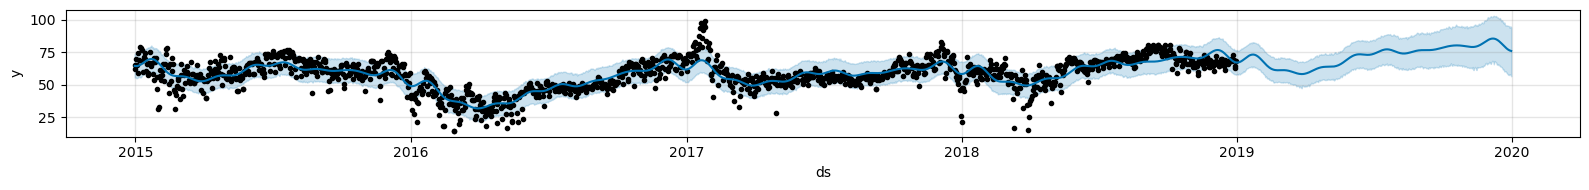

In [12]:
fig1 = m.plot(forecast,figsize=(16,2))
fig1.show()

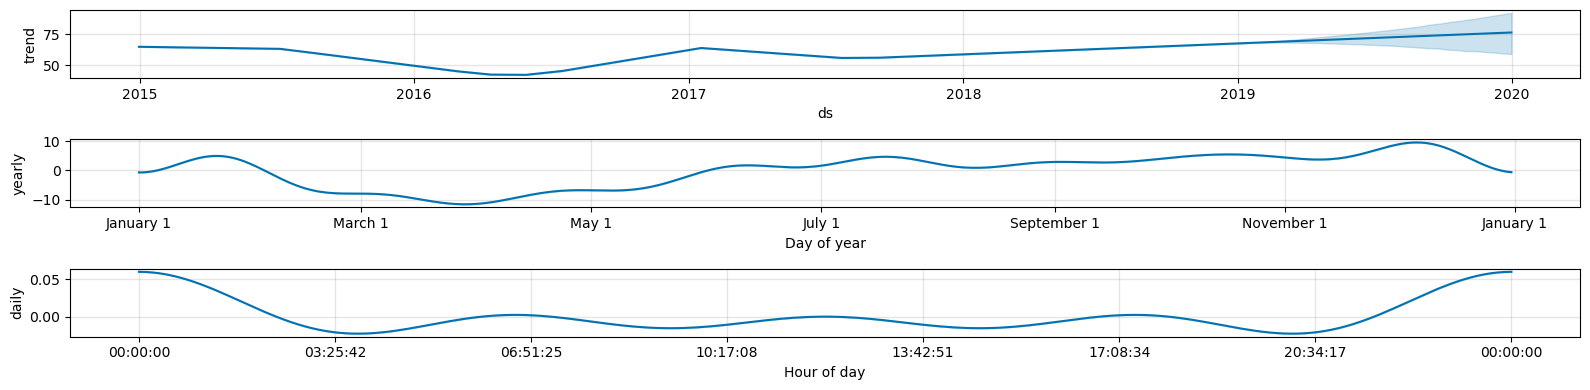

In [13]:

fig2 = m.plot_components(forecast,figsize=(16, 4))
fig2.show()